      gender_Female  gender_Male  SeniorCitizen_0  SeniorCitizen_1  \
0                 1            0                1                0   
1                 0            1                1                0   
2                 0            1                0                1   
3                 0            1                0                1   
4                 1            0                0                1   
...             ...          ...              ...              ...   
7027              1            0                1                0   
7028              0            1                0                1   
7029              0            1                1                0   
7030              0            1                1                0   
7031              0            1                1                0   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1  

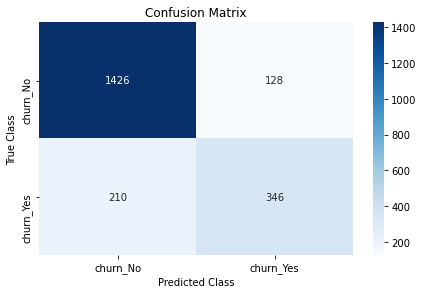

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

dataframe = pd.read_csv('./data.csv')  # Load dataset
dataframe.dropna(inplace = True) 

featureframe = dataframe.iloc[:, 1 : -1 ]
targetframe = dataframe.iloc[:, -1 ]

dummy_cols=['gender','SeniorCitizen','InternetService','TechSupport','Contract']
ff = pd.get_dummies(featureframe, columns=dummy_cols).iloc[:,14:]
feature_names = ff
features = pd.DataFrame(ff).to_numpy()
print(ff)

tf = pd.get_dummies(targetframe, columns=['Churn'] , drop_first=True) 
target_name = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.3,random_state=42)

tree_depth = 25
min_in_leaf = 1
#classifier =  DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
classifier =  DecisionTreeClassifier(criterion='entropy',max_features="auto", random_state=42, min_samples_leaf=min_in_leaf, max_depth=tree_depth)

decision_tree = classifier.fit(features_train, target_train)

#plot_tree(decision_tree) 
r = export_text(decision_tree, show_weights=True, feature_names= list(ff.columns)) 
print(r)
 
#%% now make predictions
target_predicted = decision_tree.predict(features_test)

#%%
# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
class_names = ['churn_No', 'churn_Yes']
dataframe_Confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO  Female              0     Yes        Yes       9   
1     0003-MKNFE    Male              0      No         No       9   
2     0004-TLHLJ    Male              1      No         No       4   
3     0011-IGKFF    Male              1     Yes         No      13   
4     0013-EXCHZ  Female              1     Yes         No       3   
...          ...     ...            ...     ...        ...     ...   
7027  9987-LUTYD  Female              0      No         No      13   
7028  9992-RRAMN    Male              1     Yes         No      22   
7029  9992-UJOEL    Male              0      No         No       2   
7030  9993-LHIEB    Male              0     Yes        Yes      67   
7031  9995-HOTOH    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             Yes                No             DSL             No  ...   
1        

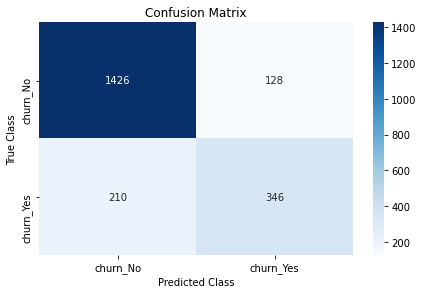

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

dataframe = pd.read_csv('./data.csv')  # Load dataset
dataframe.dropna(inplace = True) 

print(dataframe)

featureframe = dataframe.iloc[:, 1 : -1 ]
targetframe = dataframe.iloc[:, -1 ]

dummy_cols=['gender','SeniorCitizen','InternetService','TechSupport','Contract']
ff = pd.get_dummies(featureframe, columns=dummy_cols).iloc[:,14:]
feature_names = ff
features = pd.DataFrame(ff).to_numpy()
print(ff)

tf = pd.get_dummies(targetframe, columns=['Churn'] , drop_first=True) 
target_name = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.3,random_state=42)

tree_depth = 25
min_in_leaf = 1
#classifier =  DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
classifier =  DecisionTreeClassifier(criterion='entropy',max_features="auto", random_state=42, min_samples_leaf=min_in_leaf, max_depth=tree_depth)

decision_tree = classifier.fit(features_train, target_train)

#plot_tree(decision_tree) 
r = export_text(decision_tree, show_weights=True, feature_names= list(ff.columns)) 
print(r)
 
#%% now make predictions
target_predicted = decision_tree.predict(features_test)

#%%
# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
class_names = ['churn_No', 'churn_Yes']
dataframe_Confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

|--- SeniorCitizen_1 <= 0.50
|   |--- Contract_Month-to-month <= 0.50
|   |   |--- InternetService_No <= 0.50
|   |   |   |--- Contract_Two year <= 0.50
|   |   |   |   |--- TechSupport_Yes <= 0.50
|   |   |   |   |   |--- InternetService_Fiber optic <= 0.50
|   |   |   |   |   |   |--- gender_Female <= 0.50
|   |   |   |   |   |   |   |--- weights: [75.00, 6.00] class: 0
|   |   |   |   |   |   |--- gender_Female >  0.50
|   |   |   |   |   |   |   |--- weights: [66.00, 0.00] class: 0
|   |   |   |   |   |--- InternetService_Fiber optic >  0.50
|   |   |   |   |   |   |--- gender_Female <= 0.50
|   |   |   |   |   |   |   |--- weights: [69.00, 4.00] class: 0
|   |   |   |   |   |   |--- gender_Female >  0.50
|   |   |   |   |   |   |   |--- weights: [65.00, 5.00] class: 0
|   |   |   |   |--- TechSupport_Yes >  0.50
|   |   |   |   |   |--- gender_Female <= 0.50
|   |   |   |   |   |   |--- InternetService_DSL <= 0.50
|   |   |   |   |   |   |   |--- weights: [47.00, 7.00] class: 0
| 

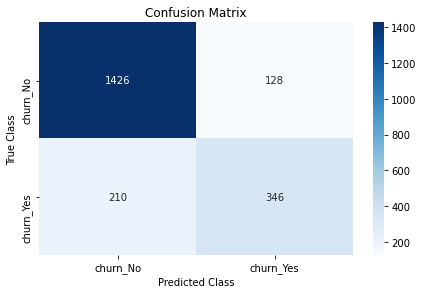

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

dataframe = pd.read_csv('./data.csv')  # Load dataset
dataframe.dropna(inplace = True) 

featureframe = dataframe.iloc[:, 1 : -1 ]
targetframe = dataframe.iloc[:, -1 ]

dummy_cols=['gender','SeniorCitizen','InternetService','TechSupport','Contract']
ff = pd.get_dummies(featureframe, columns=dummy_cols).iloc[:,14:]
feature_names = ff
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'] , drop_first=True) 
target_name = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.3,random_state=42)

tree_depth = 25
min_in_leaf = 1
#classifier =  DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
classifier =  DecisionTreeClassifier(criterion='entropy',max_features="auto", random_state=42, min_samples_leaf=min_in_leaf, max_depth=tree_depth)

decision_tree = classifier.fit(features_train, target_train)

#plot_tree(decision_tree) 
r = export_text(decision_tree, show_weights=True, feature_names= list(ff.columns)) 
print(r)
 
#%% now make predictions
target_predicted = decision_tree.predict(features_test)

#%%
# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
class_names = ['churn_No', 'churn_Yes']
dataframe_Confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

|--- MonthlyCharges_34.7 <= 0.50
|   |--- MonthlyCharges_74.4 <= 0.50
|   |   |--- MonthlyCharges_109.5 <= 0.50
|   |   |   |--- tenure_68 <= 0.50
|   |   |   |   |--- tenure_70 <= 0.50
|   |   |   |   |   |--- InternetService_No <= 0.50
|   |   |   |   |   |   |--- PaperlessBilling_No <= 0.50
|   |   |   |   |   |   |   |--- tenure_52 <= 0.50
|   |   |   |   |   |   |   |   |--- tenure_67 <= 0.50
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges_89.85 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges_74.55 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges_74.55 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges_89.85 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- tenure_67 >  0.50
|   |   |   |   |   | 

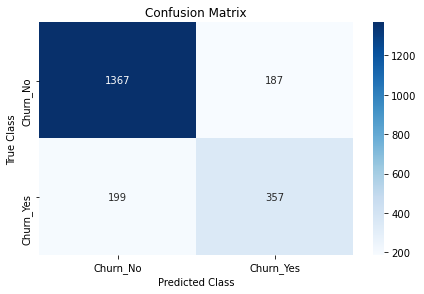

In [6]:

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

dataframe = pd.read_csv('./data.csv')  # Load dataset
dataframe.dropna(inplace = True) 

featureframe = dataframe.iloc[:, 1 : -1 ]
targetframe = dataframe.iloc[:, -1 ]



dummy_cols=['SeniorCitizen','tenure','InternetService','PaperlessBilling','MonthlyCharges']
ff = pd.get_dummies(featureframe, columns=dummy_cols).iloc[:,14:]
feature_names = ff.columns
features = pd.DataFrame(ff).to_numpy()
#print(features)

tf = pd.get_dummies(targetframe, columns=['Churn'] , drop_first=True) 
target_name = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.3,random_state=42)

tree_depth = 25
min_in_leaf = 1
#classifier =  DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
classifier =  DecisionTreeClassifier(criterion='entropy',max_features="auto", random_state=42, min_samples_leaf=min_in_leaf, max_depth=tree_depth)

decision_tree = classifier.fit(features_train, target_train)

#plot_tree(decision_tree) 
r = export_text(decision_tree, show_weights=True, feature_names= list(ff.columns)) 
print(r)
 
#%% now make predictions
target_predicted = decision_tree.predict(features_test)

#%%
# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
class_names = ['Churn_No', 'Churn_Yes']
dataframe_Confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()


|--- MonthlyCharges_34.7 <= 0.50
|   |--- MonthlyCharges_74.4 <= 0.50
|   |   |--- MonthlyCharges_109.5 <= 0.50
|   |   |   |--- tenure_68 <= 0.50
|   |   |   |   |--- tenure_70 <= 0.50
|   |   |   |   |   |--- InternetService_No <= 0.50
|   |   |   |   |   |   |--- PaperlessBilling_No <= 0.50
|   |   |   |   |   |   |   |--- tenure_52 <= 0.50
|   |   |   |   |   |   |   |   |--- tenure_67 <= 0.50
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges_89.85 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges_74.55 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges_74.55 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- MonthlyCharges_89.85 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- tenure_67 >  0.50
|   |   |   |   |   | 

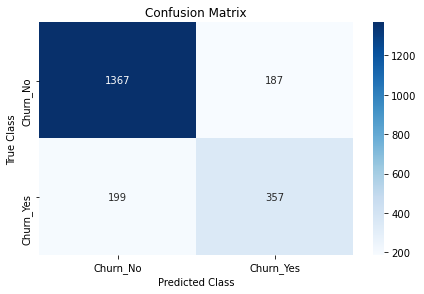

In [7]:

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

dataframe = pd.read_csv('./data.csv')  # Load dataset
dataframe.dropna(inplace = True) 

featureframe = dataframe.iloc[:, 1 : -1 ]
targetframe = dataframe.iloc[:, -1 ]



dummy_cols=['SeniorCitizen','tenure','InternetService','PaperlessBilling','MonthlyCharges']
ff = pd.get_dummies(featureframe, columns=dummy_cols).iloc[:,14:]
feature_names = ff.columns
features = pd.DataFrame(ff).to_numpy()
#print(features)

tf = pd.get_dummies(targetframe, columns=['Churn'] , drop_first=True) 
target_name = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.3,random_state=42)

tree_depth = 25
min_in_leaf = 1
#classifier =  DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
classifier =  DecisionTreeClassifier(criterion='entropy',max_features="auto", random_state=42, min_samples_leaf=min_in_leaf, max_depth=tree_depth)

decision_tree = classifier.fit(features_train, target_train)

#plot_tree(decision_tree) 
r = export_text(decision_tree, show_weights=True, feature_names= list(ff.columns)) 
#text_representation = tree.export_text(clf, feature_names=iris.feature_names)
print(r)
 
#%% now make predictions
target_predicted = decision_tree.predict(features_test)

#%%
# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
class_names = ['Churn_No', 'Churn_Yes']
dataframe_Confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)


# create heatmap
sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

#=======================

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

df = pd.read_csv('./data.csv')  # Load dataset
#df.dropna(inplace = True) 

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,1,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

df = pd.read_csv('./data.csv')  # Load dataset
#df.dropna(inplace = True) 

df.head()

X=df.drop(['Churn','customerID'],axis=1)
y=df['Churn']

#Spliting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

ValueError: could not convert string to float: 'Male'

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

df = pd.read_csv('./data.csv')  # Load dataset
#df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
#print(feature_names)
features = pd.DataFrame(ff).to_numpy()


#tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True)
tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)

X=features
y=target

#Spliting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


DecisionTreeClassifier(max_leaf_nodes=11, random_state=42)

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
#print(feature_names)
features = pd.DataFrame(ff).to_numpy()


#tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
#target_names = tf.columns

#target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)

df['Churn'].value_counts()

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]

df_class_1_over = df_class_1.sample(5174, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


X=df_test_over.drop(['Churn','customerID'],axis=1)
y = df_test_over['Churn']
#X=features
#y=target


#Spliting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_rfc=model.predict(X_test)
print(classification_report(y_test,y_pred_rfc))
print('Model Accuracy:',model.score(X_test,y_test))


#==================




ValueError: a must be greater than 0 unless no samples are taken

In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
#print(feature_names)
features = pd.DataFrame(ff).to_numpy()


#tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
#target_names = tf.columns

#target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)

df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [14]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 



#tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
#target_names = tf.columns

#target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)

df['Churn'].value_counts()

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]

df_class_1_over = df_class_1.sample(5163, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


X=df_test_over.drop(['Churn','customerID'],axis=1)
y = df_test_over['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_rfc=model.predict(X_test)
print(classification_report(y_test,y_pred_rfc))
print('Model Accuracy:',model.score(X_test,y_test))

ValueError: a must be greater than 0 unless no samples are taken

In [15]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 



#tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
#target_names = tf.columns

#target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)

df['Churn'].value_counts()

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]

df_class_1_over = df_class_1.sample(5163, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


X=df_test_over.drop(['Churn','customerID'],axis=1)
y = df_test_over['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_rfc=model.predict(X_test)

print(classification_report(y_test,y_pred_rfc))
print('Model Accuracy:',model.score(X_test,y_test))

ValueError: a must be greater than 0 unless no samples are taken

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

#featureframe = df.iloc[:, 1 : -1 ]
#targetframe = df.iloc[:, -1 ]


#ff = pd.get_dummies(featureframe, drop_first=True)
#feature_names = ff.columns
#print(feature_names)
#features = pd.DataFrame(ff).to_numpy()


#tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
#target_names = tf.columns

#target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)

#X=features
#y=target

df['Churn'].value_counts()

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]
df_class_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)

#X=features
#y=target

target['Churn'].value_counts()

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)
target

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)
target

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)
df['Churn'].value_counts()

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]


df_class_1_over = df_class_1.sample(5163,replace=True)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


ValueError: a must be greater than 0 unless no samples are taken

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)
target
#X=features
#y=target

df['Churn'].value_counts()

df_class_1=df[target==1]
df_class_1

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,0004-TLHLJ,Male,1,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes
18,0022-TCJCI,Male,1,No,No,45,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.50,Yes
19,0023-HGHWL,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009,9961-JBNMK,Male,1,No,No,21,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.30,Yes
7012,9965-YOKZB,Male,1,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.85,790.15,Yes
7025,9985-MWVIX,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
7026,9986-BONCE,Female,1,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,Yes


In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)
target
#X=features
#y=target

df['Churn'].value_counts()

df_class_1=df[target==1]

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)
target
#X=features
#y=target

df['Churn'].value_counts()

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]


df_class_1_over = target.sample(5163,replace=True)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
#target = np.ravel(target)
target
#X=features
#y=target

df['Churn'].value_counts()

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]


df_class_1_over = target.sample(5163,replace=True)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]


ff = pd.get_dummies(featureframe, drop_first=True)
feature_names = ff.columns
print(feature_names)
features = pd.DataFrame(ff).to_numpy()


tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy( )
target = np.ravel(target)
target
#X=features
#y=target



Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

Gender_Category_map = {'Male' : 1,'Female': 0,}
Partner_Category_map = {'Yes' : 1,'No': 0,}
Dependents_Category_map = {'Yes' : 1,'No': 0,}
PhoneService_Category_map = {'Yes' : 1,'No': 0,}
OnlineSecurity_Category_map = {'Yes' : 1,'No': 0,}
OnlineBackup_Category_map = {'Yes' : 1,'No': 0,}
DeviceProtection_Category_map = {'Yes' : 1,'No': 0,}
TechSupport_Category_map = {'Yes' : 1,'No': 0,}
StreamingTV_Category_map = {'Yes' : 1,'NO': 0,}
StreamingMovies_Category_map = {'Yes' : 1,'No': 0,}
PaperlessBilling_Category_map = {'Yes' : 1,'No': 0,}
Churn_Category_map = {'Yes' : 1,'No': 0,}

df.loc[:, 'gender'] = df['gender'].map(Gender_Category_map)
df.loc[:, 'Partner'] = df['Partner'].map(Partner_Category_map)
df.loc[:, 'Dependents'] = df['Dependents'].map(Dependents_Category_map)
df.loc[:, 'PhoneService'] = df['PhoneService'].map(PhoneService_Category_map)
df.loc[:, 'OnlineSecurity'] = df['OnlineSecurity'].map(OnlineSecurity_Category_map)
df.loc[:, 'OnlineBackup'] = df['OnlineBackup'].map(OnlineBackup_Category_map)
df.loc[:, 'DeviceProtection'] = df['DeviceProtection'].map(DeviceProtection_Category_map)
df.loc[:, 'TechSupport'] = df['TechSupport'].map(TechSupport_Category_map)
df.loc[:, 'StreamingTV'] = df['StreamingTV'].map(StreamingTV_Category_map)
df.loc[:, 'StreamingMovies'] = df['StreamingMovies'].map(StreamingMovies_Category_map)
df.loc[:, 'PaperlessBilling'] = df['PaperlessBilling'].map(PaperlessBilling_Category_map)
df.loc[:, 'Churn'] = df['Churn'].map(Churn_Category_map)


df.loc[:, 'gender']

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]

df_class_1_over = df_class_1.sample(5163, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

X=df_test_over.drop(['Churn','customerID'],axis=1)
y = df_test_over['Churn']


#Spliting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_rfc=model.predict(X_test)
print(classification_report(y_test,y_pred_rfc))
print('Model Accuracy:',model.score(X_test,y_test))


#==================




ValueError: could not convert string to float: 'No'

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

Gender_Category_map = {'Male' : 1,'Female': 0,}
Partner_Category_map = {'Yes' : 1,'No': 0,}
Dependents_Category_map = {'Yes' : 1,'No': 0,}
PhoneService_Category_map = {'Yes' : 1,'No': 0,}
OnlineSecurity_Category_map = {'Yes' : 1,'No': 0,}
OnlineBackup_Category_map = {'Yes' : 1,'No': 0,}
DeviceProtection_Category_map = {'Yes' : 1,'No': 0,}
TechSupport_Category_map = {'Yes' : 1,'No': 0,}
StreamingTV_Category_map = {'Yes' : 1,'NO': 0,}
StreamingMovies_Category_map = {'Yes' : 1,'No': 0,}
PaperlessBilling_Category_map = {'Yes' : 1,'No': 0,}
Churn_Category_map = {'Yes' : 1,'No': 0,}

df.loc[:, 'gender'] = df['gender'].map(Gender_Category_map)
df.loc[:, 'Partner'] = df['Partner'].map(Partner_Category_map)
df.loc[:, 'Dependents'] = df['Dependents'].map(Dependents_Category_map)
df.loc[:, 'PhoneService'] = df['PhoneService'].map(PhoneService_Category_map)
df.loc[:, 'OnlineSecurity'] = df['OnlineSecurity'].map(OnlineSecurity_Category_map)
df.loc[:, 'OnlineBackup'] = df['OnlineBackup'].map(OnlineBackup_Category_map)
df.loc[:, 'DeviceProtection'] = df['DeviceProtection'].map(DeviceProtection_Category_map)
df.loc[:, 'TechSupport'] = df['TechSupport'].map(TechSupport_Category_map)
df.loc[:, 'StreamingTV'] = df['StreamingTV'].map(StreamingTV_Category_map)
df.loc[:, 'StreamingMovies'] = df['StreamingMovies'].map(StreamingMovies_Category_map)
df.loc[:, 'PaperlessBilling'] = df['PaperlessBilling'].map(PaperlessBilling_Category_map)
df.loc[:, 'Churn'] = df['Churn'].map(Churn_Category_map)


df.loc[:, 'Churn']



0       0
1       0
2       1
3       1
4       1
       ..
7027    0
7028    1
7029    0
7030    0
7031    0
Name: Churn, Length: 7032, dtype: int64

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

Gender_Category_map = {'Male' : 1,'Female': 0,}
Partner_Category_map = {'Yes' : 1,'No': 0,}
Dependents_Category_map = {'Yes' : 1,'No': 0,}
PhoneService_Category_map = {'Yes' : 1,'No': 0,}
OnlineSecurity_Category_map = {'Yes' : 1,'No': 0,}
OnlineBackup_Category_map = {'Yes' : 1,'No': 0,}
DeviceProtection_Category_map = {'Yes' : 1,'No': 0,}
TechSupport_Category_map = {'Yes' : 1,'No': 0,}
StreamingTV_Category_map = {'Yes' : 1,'NO': 0,}
StreamingMovies_Category_map = {'Yes' : 1,'No': 0,}
PaperlessBilling_Category_map = {'Yes' : 1,'No': 0,}
Churn_Category_map = {'Yes' : 1,'No': 0,}

df.loc[:, 'gender'] = df['gender'].map(Gender_Category_map)
df.loc[:, 'Partner'] = df['Partner'].map(Partner_Category_map)
df.loc[:, 'Dependents'] = df['Dependents'].map(Dependents_Category_map)
df.loc[:, 'PhoneService'] = df['PhoneService'].map(PhoneService_Category_map)
df.loc[:, 'OnlineSecurity'] = df['OnlineSecurity'].map(OnlineSecurity_Category_map)
df.loc[:, 'OnlineBackup'] = df['OnlineBackup'].map(OnlineBackup_Category_map)
df.loc[:, 'DeviceProtection'] = df['DeviceProtection'].map(DeviceProtection_Category_map)
df.loc[:, 'TechSupport'] = df['TechSupport'].map(TechSupport_Category_map)
df.loc[:, 'StreamingTV'] = df['StreamingTV'].map(StreamingTV_Category_map)
df.loc[:, 'StreamingMovies'] = df['StreamingMovies'].map(StreamingMovies_Category_map)
df.loc[:, 'PaperlessBilling'] = df['PaperlessBilling'].map(PaperlessBilling_Category_map)
df.loc[:, 'Churn'] = df['Churn'].map(Churn_Category_map)


df.loc[:, 'gender']

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]

df_class_1_over = df_class_1.sample(5163, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

X=df_test_over.drop(['Churn','customerID'],axis=1)
y = df_test_over['Churn']





In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

Gender_Category_map = {'Male' : 1,'Female': 0,}
Partner_Category_map = {'Yes' : 1,'No': 0,}
Dependents_Category_map = {'Yes' : 1,'No': 0,}
PhoneService_Category_map = {'Yes' : 1,'No': 0,}
OnlineSecurity_Category_map = {'Yes' : 1,'No': 0,}
OnlineBackup_Category_map = {'Yes' : 1,'No': 0,}
DeviceProtection_Category_map = {'Yes' : 1,'No': 0,}
TechSupport_Category_map = {'Yes' : 1,'No': 0,}
StreamingTV_Category_map = {'Yes' : 1,'NO': 0,}
StreamingMovies_Category_map = {'Yes' : 1,'No': 0,}
PaperlessBilling_Category_map = {'Yes' : 1,'No': 0,}
Churn_Category_map = {'Yes' : 1,'No': 0,}

df.loc[:, 'gender'] = df['gender'].map(Gender_Category_map)
df.loc[:, 'Partner'] = df['Partner'].map(Partner_Category_map)
df.loc[:, 'Dependents'] = df['Dependents'].map(Dependents_Category_map)
df.loc[:, 'PhoneService'] = df['PhoneService'].map(PhoneService_Category_map)
df.loc[:, 'OnlineSecurity'] = df['OnlineSecurity'].map(OnlineSecurity_Category_map)
df.loc[:, 'OnlineBackup'] = df['OnlineBackup'].map(OnlineBackup_Category_map)
df.loc[:, 'DeviceProtection'] = df['DeviceProtection'].map(DeviceProtection_Category_map)
df.loc[:, 'TechSupport'] = df['TechSupport'].map(TechSupport_Category_map)
df.loc[:, 'StreamingTV'] = df['StreamingTV'].map(StreamingTV_Category_map)
df.loc[:, 'StreamingMovies'] = df['StreamingMovies'].map(StreamingMovies_Category_map)
df.loc[:, 'PaperlessBilling'] = df['PaperlessBilling'].map(PaperlessBilling_Category_map)
df.loc[:, 'Churn'] = df['Churn'].map(Churn_Category_map)


df.loc[:, 'gender']

df_class_1=df[df['Churn']==1]
df_class_0=df[df['Churn']==0]

df_class_1_over = df_class_1.sample(5163, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

X=df_test_over.drop(['Churn','customerID'],axis=1)
y = df_test_over['Churn']

X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,1,9,1,No,DSL,0.0,1.0,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.60,593.30
1,1,0,0,0,9,1,Yes,DSL,0.0,0.0,0.0,0.0,NaN,1.0,Month-to-month,0,Mailed check,59.90,542.40
5,0,0,0,1,9,1,No,DSL,0.0,0.0,0.0,1.0,1.0,1.0,Month-to-month,1,Credit card (automatic),69.40,571.45
6,0,1,1,0,71,1,No,Fiber optic,1.0,1.0,1.0,1.0,1.0,1.0,Two year,1,Bank transfer (automatic),109.70,7904.25
7,1,0,1,0,63,1,Yes,Fiber optic,1.0,0.0,0.0,1.0,NaN,0.0,Two year,1,Credit card (automatic),84.65,5377.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0,1,1,1,25,0,No phone service,DSL,1.0,1.0,1.0,0.0,1.0,1.0,Month-to-month,1,Credit card (automatic),58.60,1502.65
5531,1,1,1,0,5,0,No phone service,DSL,0.0,0.0,0.0,0.0,NaN,0.0,Month-to-month,1,Electronic check,24.95,100.40
3035,1,0,1,1,67,1,Yes,DSL,1.0,0.0,1.0,0.0,1.0,1.0,Two year,1,Electronic check,79.70,5293.40
6732,1,0,1,1,30,1,Yes,Fiber optic,1.0,1.0,0.0,0.0,1.0,0.0,Month-to-month,1,Electronic check,94.40,2838.70


In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

dummy_cols=['SeniorCitizen','tenure','InternetService','PaperlessBilling','MonthlyCharges']
df=df[dummy_cols]
df

,SeniorCitizen,tenure,InternetService,PaperlessBilling,MonthlyCharges
0,0,9,DSL,Yes,65.60
1,0,9,DSL,No,59.90
2,1,4,Fiber optic,Yes,73.90
3,1,13,Fiber optic,Yes,98.00
4,1,3,Fiber optic,Yes,83.90
...,...,...,...,...,...
7027,0,13,DSL,No,55.15
7028,1,22,Fiber optic,Yes,85.10
7029,0,2,DSL,Yes,50.30
7030,0,67,DSL,No,67.85


In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 

dummy_cols=['SeniorCitizen','tenure','InternetService','PaperlessBilling','MonthlyCharges']
df=df[dummy_cols]

df



,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,Churn
0,0,9,Yes,65.60,No
1,0,9,No,59.90,No
2,1,4,Yes,73.90,Yes
3,1,13,Yes,98.00,Yes
4,1,3,Yes,83.90,Yes
...,...,...,...,...,...
7027,0,13,No,55.15,No
7028,1,22,Yes,85.10,Yes
7029,0,2,Yes,50.30,No
7030,0,67,No,67.85,No


In [49]:

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np


from sklearn.tree import _tree

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 
df.info()
df.head(2).T
df['Churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


No     5163
Yes    1869
Name: Churn, dtype: int64

|--- tenure_60 <= 0.50
|   |--- tenure_44 <= 0.50
|   |   |--- MonthlyCharges_96.05 <= 0.50
|   |   |   |--- tenure_3 <= 0.50
|   |   |   |   |--- tenure_64 <= 0.50
|   |   |   |   |   |--- tenure_72 <= 0.50
|   |   |   |   |   |   |--- tenure_56 <= 0.50
|   |   |   |   |   |   |   |--- tenure_61 <= 0.50
|   |   |   |   |   |   |   |   |--- tenure_52 <= 0.50
|   |   |   |   |   |   |   |   |   |--- tenure_51 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges_25.7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges_25.7 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- tenure_51 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges_90.35 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges_90.35

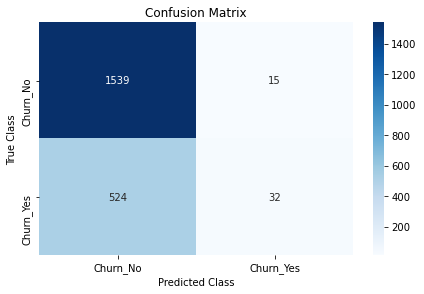

if (tenure_60 <= 0.5) and (tenure_44 <= 0.5) and (MonthlyCharges_96.05 <= 0.5) and (tenure_3 <= 0.5) and (tenure_64 <= 0.5) and (tenure_72 <= 0.5) and (tenure_56 <= 0.5) and (tenure_61 <= 0.5) and (tenure_52 <= 0.5) and (tenure_51 <= 0.5) and (MonthlyCharges_25.7 <= 0.5) and (MonthlyCharges_19.7 <= 0.5) and (MonthlyCharges_19.85 <= 0.5) and (tenure_63 <= 0.5) and (MonthlyCharges_19.55 <= 0.5) and (InternetService_No <= 0.5) and (MonthlyCharges_85.35 <= 0.5) and (tenure_68 <= 0.5) and (tenure_65 <= 0.5) and (MonthlyCharges_44.8 <= 0.5) and (MonthlyCharges_24.8 <= 0.5) and (MonthlyCharges_98.5 <= 0.5) and (tenure_57 <= 0.5) and (MonthlyCharges_80.1 <= 0.5) and (tenure_45 <= 0.5) then class: Churn_No (proba: 63.55%) | based on 3,015 samples
if (tenure_60 <= 0.5) and (tenure_44 <= 0.5) and (MonthlyCharges_96.05 <= 0.5) and (tenure_3 <= 0.5) and (tenure_64 <= 0.5) and (tenure_72 <= 0.5) and (tenure_56 <= 0.5) and (tenure_61 <= 0.5) and (tenure_52 <= 0.5) and (tenure_51 <= 0.5) and (MonthlyC

In [47]:

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np


from sklearn.tree import _tree

df = pd.read_csv('./data.csv')  # Load dataset
df.dropna(inplace = True) 


featureframe = df.iloc[:, 1 : -1 ]
targetframe = df.iloc[:, -1 ]



dummy_cols=['SeniorCitizen','tenure','InternetService','PaperlessBilling','MonthlyCharges']
ff = pd.get_dummies(featureframe, columns=dummy_cols, drop_first=True).iloc[:,14:]
feature_names = ff.columns
#print(feature_names)
features = pd.DataFrame(ff).to_numpy()

tf = pd.get_dummies(targetframe, columns=['Churn'], drop_first=True) 
target_names = tf.columns

target = pd.DataFrame(tf).to_numpy()
target = np.ravel(target)


# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.3,random_state=42)

tree_depth = 25
min_in_leaf = 1
#classifier =  DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
classifier =  DecisionTreeClassifier(criterion='entropy',max_features="auto", random_state=42, min_samples_leaf=min_in_leaf, max_depth=tree_depth)

decision_tree = classifier.fit(features_train, target_train)

#plot_tree(decision_tree) 
r = export_text(decision_tree, show_weights=True, feature_names= list(ff.columns)) 
print(r)
 
#%% now make predictions
target_predicted = decision_tree.predict(features_test)

#%%
# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
class_names = ['Churn_No', 'Churn_Yes']
dataframe_Confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

#==========

#=======================
#=======================

def get_rules(decision_tree, feature_names, class_names):
    tree_ = decision_tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

rules = get_rules(classifier, feature_names, class_names)
for a in rules:
        print(a)